# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2023
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [2]:
from sklearn.model_selection import train_test_split # sklearn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor # sklearn 
from sklearn.preprocessing import StandardScaler # sklearn 

In [3]:
def find_best_k_classifier(X_train, X_test, y_train, y_test):
    max_k = 0
    max_score = 0
    score = 0
    k = 1
    while score >= max_score and k < len(X_train):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        # print(f'K={k} | Score={score}')
        if score > max_score:
            max_k = k
            max_score = score
        k += 1
    return (max_k, max_score)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
k_best, score_best = find_best_k_classifier(X_train_scaled, X_test_scaled, y_train, y_test) # 'compute the best k'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 1 , score = 0.9736842105263158


## Synthetic dataset  

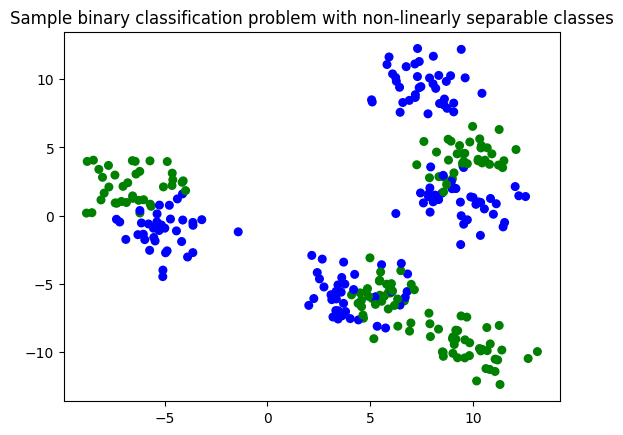

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2023
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [6]:
def find_best_k_regression(X_train, X_test, y_train, y_test):
    max_k = 0
    max_score = 0
    score = 0
    k = 1
    while k < len(X_train):
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        # print(f'K={k} | Score={score}')
        if score > max_score:
            max_k = k
            max_score = score
        k += 1
    return (max_k, max_score)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
k_best, score_best = find_best_k_regression(X_train_scaled, X_test_scaled, y_train, y_test) # 'compute the best k'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 12 , score = 0.7206641737891737


# Visualize decision boundary 

In [42]:
# x = np.array([[1, 2, 3], [4, 5, 6]])
# x_ravel = np.ravel(x)
# y = np.array([[7, 8, 9], [10, 11, 12]])
# y_ravel = np.ravel(y)
# print(np.c_[x_ravel, y_ravel])
# print(np.r_[x_ravel, y_ravel])

In [38]:
def visualize_decision_boundary(knn, X_train, X_test, y_train, y_test):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    precision = .02 # step size in the mesh
    # Calculate min, max and limits
    X = np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, precision),
                         np.arange(x2_min, x2_max, precision))

    # numpy.c_  concatenation along the second axis
    # ravel() Returns a contiguous flattened array.
        # x = np.array([[1, 2, 3], [4, 5, 6]])
        # np.ravel(x) = [1 2 3 4 5 6]
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    # m= target_samples_grid.shape[0]
    # target_samples_grid_1= np.c_[np.ones(shape=(m,1)),target_samples_grid]
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = knn.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=50, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=50, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

Call prediction for all grid values (precision of drawing = 0.02, you may configure to speed up e.g. precision=0.05)


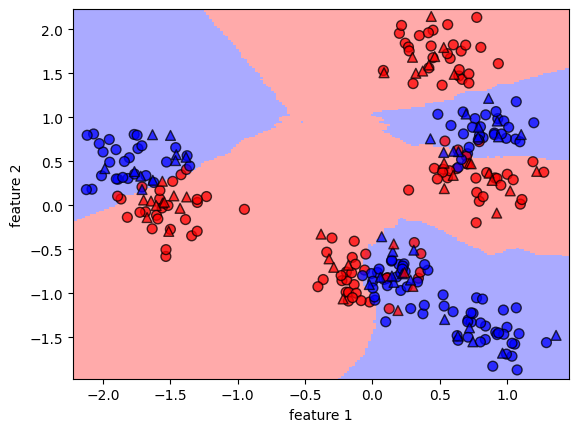

In [39]:
regr_knn = KNeighborsRegressor(n_neighbors = k_best)
regr_knn.fit(X_train_scaled, y_train)
score = regr_knn.score(X_test_scaled, y_test)
visualize_decision_boundary(regr_knn, X_train_scaled, X_test_scaled, y_train, y_test)